## Preditcing the sale price of Bulldozer prices using Machine Learning 

In this notebook we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers

## 1.Problem Definition

How accurately can we predict the future sale price of a bulldozer sold at an auction, given it's characteristics and previous example of how much similar bulldozers have been sold for.

**Note : The goal of the contest is to predict the sale price of a particular piece of heavy equiment at auction based on it's usage, equipment type, and configuaration. 


## 2. Data

Data can be downloaded from Kaggle - Blue Book for Bulldozers : https://www.kaggle.com/c/bluebook-for-bulldozers/data

he data for this competition is split into three parts:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set     throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 -   November 2012. Your score on the test set determines your final rank for the competition.

The key fields are in train.csv are:

SalesID: the uniue identifier of the sale
MachineID: the unique identifier of a machine.  A machine can be sold multiple times
saleprice: what the machine sold for at auction (only provided in train.csv)
saledate: the date of the sale


* The data is sourced from auction result postings and includes information on usage and equipment configurations.

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the Evaluation of this project check: 

https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

## 4. Features

Kaggle provides a data Dictionary providing all of the features of this dataset. 

* Variable	Description
* SalesID	  unique identifier of a particular sale of a machine at auction
* MachineID	  identifier for a particular machine;  machines may have multiple sales
* ModelID	  identifier for a unique machine model (i.e. fiModelDesc)
* datasource	  source of the sale record;  some sources are more diligent about reporting attributes of the machine than       others.  Note that a particular datasource may report on multiple auctioneerIDs.
* auctioneerID	  identifier of a particular auctioneer, i.e. company that sold the machine at auction.  Not the same as         datasource.
* YearMade	  year of manufacturer of the Machine
* MachineHoursCurrentMeter	  current usage of the machine in hours at time of sale (saledate);  null or 0 means no hours have   been reported for that sale
* UsageBand	  value (low, medium, high) calculated comparing this particular Machine-Sale hours to average usage for the fiBaseModel;  e.g. 'Low' means this machine has less hours given it's lifespan relative to average of fiBaseModel.
* Saledate	  time of sale
* Saleprice	  cost of sale in USD
* fiModelDesc	  Description of a unique machine model (see ModelID); concatenation of fiBaseModel & fiSecondaryDesc & fiModelSeries & fiModelDescriptor
* fiBaseModel	  disaggregation of fiModelDesc
* fiSecondaryDesc	  disaggregation of fiModelDesc
* fiModelSeries	  disaggregation of fiModelDesc
* fiModelDescriptor	  disaggregation of fiModelDesc
* ProductSize	  Don't know what this is 
* ProductClassDesc	  description of 2nd level hierarchical grouping (below ProductGroup) of fiModelDesc
* State	  US State in which sale occurred
* ProductGroup	  identifier for top-level hierarchical grouping of fiModelDesc
* ProductGroupDesc	  description of top-level hierarchical grouping of fiModelDesc
* Drive_System	machine configuration;  typcially describes whether 2 or 4 wheel drive
* Enclosure	machine configuration - does machine have an enclosed cab or not
* Forks	machine configuration - attachment used for lifting
* Pad_Type	machine configuration - type of treads a crawler machine uses
* Ride_Control	machine configuration - optional feature on loaders to make the ride smoother
* Stick	machine configuration - type of control 
* Transmission	machine configuration - describes type of transmission;  typically automatic or manual
* Turbocharged	machine configuration - engine naturally aspirated or turbocharged
* Blade_Extension	machine configuration - extension of standard blade
* Blade_Width	machine configuration - width of blade
* Enclosure_Type	machine configuration - does machine have an enclosed cab or not
* Engine_Horsepower	machine configuration - engine horsepower rating
* Hydraulics	machine configuration - type of hydraulics
* Pushblock	machine configuration - option
* Ripper	machine configuration - implement attached to machine to till soil
* Scarifier	machine configuration - implement attached to machine to condition soil
* Tip_control	machine configuration - type of blade control
* Tire_Size	machine configuration - size of primary tires
* Coupler	machine configuration - type of implement interface
* Coupler_System	machine configuration - type of implement interface
* Grouser_Tracks	machine configuration - describes ground contact interface
* Hydraulics_Flow	machine configuration - normal or high flow hydraulic system
* Track_Type	machine configuration - type of treads a crawler machine uses
* Undercarriage_Pad_Width	machine configuration - width of crawler treads
* Stick_Length	machine configuration - length of machine digging implement
* Thumb	machine configuration - attachment used for grabbing
* Pattern_Changer	machine configuration - can adjust the operator control configuration to suit the user
* Grouser_Type	machine configuration - type of treads a crawler machine uses
* Backhoe_Mounting	machine configuration - optional interface used to add a backhoe attachment
* Blade_Type	machine configuration - describes type of blade
* Travel_Controls	machine configuration - describes operator control configuration
* Differential_Type	machine configuration - differential type, typically locking or standard
* Steering_Controls	machine configuration - describes operator control configuration


## 5. Modelling

## 6. Experimentation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
# Import the training and validation sets

df = pd.read_csv("data/TrainAndValid.csv", low_memory= False)
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

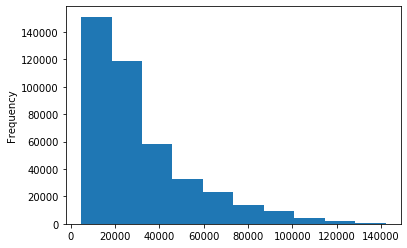

In [6]:
df.SalePrice.plot.hist()

# Parsing dates

When we work with Time series data, we want to enrich the time and date component as much as possible. We can do that by telling pandas which of our columns has dates in it
using the 'parse_dates' parameter

In [7]:
#Import data again , but this time parse dates

df = pd.read_csv("Data/TrainAndValid.csv", low_memory= False, parse_dates= ["saledate"])
df.saledate[:1000]


0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

In [8]:
df.saledate.dtype

dtype('<M8[ns]')

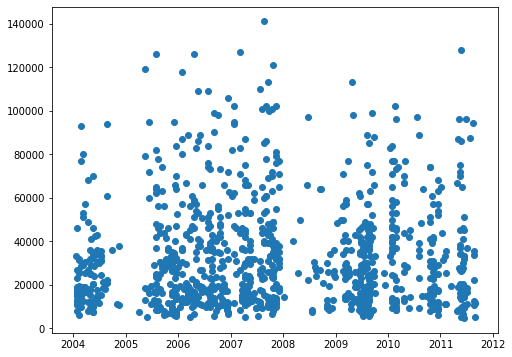

In [9]:
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

In [10]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [11]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort dataframe by saledate

In [12]:
df.sort_values("saledate", inplace= True)
df.head(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


### We make a copy of the original datafrme so when we manipulate the copy, we'e still got our original data


In [13]:
df_tmp = df.copy()

### Add datetime parameters for "saledate" column

In [14]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayofWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayofYear"] = df_tmp.saledate.dt.dayofyear


In [15]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [16]:
# Check the values of different columns

df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

## 5. Modelling 

We've done enough EDA (we could always do more), but let's start some model driven EDA

In [17]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(n_jobs = -1,  # Data is huge, -1 means we're using all processors
                             random_state = 42)


In [18]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

## Save preprocessed data 

In [19]:
#Export current tmp dataframe

df_tmp.to_csv("data/tempdata.csv", index = False)

## Split our Data into Training and Validation data 

In [20]:
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

In [21]:
df_val.shape, df_train.shape

((11573, 58), (401125, 58))

### Split the Training and Validation Data into X and y separately 

In [22]:
# Splitting the training data

X_train = df_train.drop("SalePrice", axis = 1)
y_train = df_train["SalePrice"]

# Splitting the validation data

X_val = df_val.drop("SalePrice", axis = 1)
y_val = df_val["SalePrice"]

In [23]:
X_train.shape, y_train.shape

((401125, 57), (401125,))

In [24]:
X_val.shape, y_val.shape

((11573, 57), (11573,))

## Preprocessing the data 

### 1. Convert the String fields into Categories 

In [25]:
X_train.dtypes

SalesID                              int64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                       float64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                           object
saledate                    datetime64[ns]
fiModelDesc                         object
fiBaseModel                         object
fiSecondaryDesc                     object
fiModelSeries                       object
fiModelDescriptor                   object
ProductSize                         object
fiProductClassDesc                  object
state                               object
ProductGroup                        object
ProductGroupDesc                    object
Drive_System                        object
Enclosure                           object
Forks                               object
Pad_Type                            object
Ride_Contro

In [26]:
# Find the columns which contains strings

for label, content in X_train.items():
    
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [27]:
for label, content in X_train.items():
    if pd.api.types.is_string_dtype(content):
        X_train[label] = content.astype("category").cat.as_ordered() # the category will be ordered by A-Z. Will assign numerical values to categories

In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401125 entries, 205615 to 393123
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   401125 non-null  int64         
 1   MachineID                 401125 non-null  int64         
 2   ModelID                   401125 non-null  int64         
 3   datasource                401125 non-null  int64         
 4   auctioneerID              380989 non-null  float64       
 5   YearMade                  401125 non-null  int64         
 6   MachineHoursCurrentMeter  142765 non-null  float64       
 7   UsageBand                 69639 non-null   category      
 8   saledate                  401125 non-null  datetime64[ns]
 9   fiModelDesc               401125 non-null  category      
 10  fiBaseModel               401125 non-null  category      
 11  fiSecondaryDesc           263934 non-null  category      
 1

In [29]:
X_train.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [30]:
X_train.state.cat.codes # Numerical value of category

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
393098    31
400217    31
400302    31
400393    31
393123    31
Length: 401125, dtype: int8

In [31]:
# If you're wondering what df.items does :  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.items.html

### Similar process for Validation data

In [32]:
for label, content in X_val.items():
    if pd.api.types.is_string_dtype(content):
        X_val[label] = content.astype("category").cat.as_ordered()

In [33]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11573 entries, 405675 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   11573 non-null  int64         
 1   MachineID                 11573 non-null  int64         
 2   ModelID                   11573 non-null  int64         
 3   datasource                11573 non-null  int64         
 4   auctioneerID              11573 non-null  float64       
 5   YearMade                  11573 non-null  int64         
 6   MachineHoursCurrentMeter  4739 non-null   float64       
 7   UsageBand                 4031 non-null   category      
 8   saledate                  11573 non-null  datetime64[ns]
 9   fiModelDesc               11573 non-null  category      
 10  fiBaseModel               11573 non-null  category      
 11  fiSecondaryDesc           8037 non-null   category      
 12  fiModelSerie

### Find our Numeric data types

In [34]:
for label, content in X_train.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofWeek
saleDayofYear


In [35]:
X_train.ModelID

205615     8434
274835    10150
141296     4139
212552     8591
62755      4089
          ...  
393098     4331
400217     9580
400302     9580
400393    17432
393123     4102
Name: ModelID, Length: 401125, dtype: int64

### Check for which Numeric columns which has null values 

In [36]:
for label, content in X_train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


### Similar process for validation data

In [37]:
for label, content in X_val.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

MachineHoursCurrentMeter


In [38]:
X_val.auctioneerID.isnull().sum()

0

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

numerical_transformer = Pipeline(steps = [("imputer", SimpleImputer(strategy = "median"))])
categorical_transformer = Pipeline(steps = [("imputer", SimpleImputer(strategy= 'constant', fill_value='missing')),
                                            ("onehot", OneHotEncoder(handle_unknown='ignore'))])

numeric_features_train = X_train.select_dtypes(include = ["int64", "float64"]).columns
numeric_features_val = X_val.select_dtypes(include = ["int64", "float64"]).columns

categorical_feaures_train = X_train.select_dtypes(include = ["object", "category"]).columns
categorical_features_val = X_val.select_dtypes(include = ["object", "category"]).columns


### Next we use the ColumnTransformer to apply the transformations to the correct columns in the dataframe. 

from sklearn.compose import ColumnTransformer

preprocessor_train = ColumnTransformer(transformers = [
    ("num", numerical_transformer, numeric_features_train),
    ("cat_train", categorical_transformer, categorical_feaures_train)
])

preprocessor_val = ColumnTransformer(transformers = [
    ("num", numerical_transformer, numeric_features_val),
    ("cat_val", categorical_transformer, categorical_features_val)
])

X_train.isnull().sum(), X_train.dtypes

In [39]:
# Check missing data 
X_train.isna().sum()

SalesID                          0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                   331486
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             137191
fiModelSeries               344217
fiModelDescriptor           329206
ProductSize                 210775
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                296764
Enclosure                      325
Forks                       209048
Pad_Type                    321991
Ride_Control                252519
Stick                       321991
Transmission                217895
Turbocharged                321991
Blade_Extension             375906
Blade_Width         

## Fill Missing values 

### Fill Numeric missing values first

In [40]:
# List the numeric column names 

for label, content in X_train.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofWeek
saleDayofYear


In [41]:
# Check for which numeric columns have null values

for label, content in X_train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)


auctioneerID
MachineHoursCurrentMeter


In [42]:
# Fill numeric rows with median 

for label, content in X_train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing
            X_train[label+ "_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            X_train[label] = content.fillna(content.median())
            

In [43]:
# Check if there is any null numeric values 

for label, content in X_train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [44]:
# Check how many missing values we filled

X_train.auctioneerID_is_missing.value_counts()

False    380989
True      20136
Name: auctioneerID_is_missing, dtype: int64

## We repeat the same and fill the X_val missing numeric data 

In [45]:
# Fill numeric rows with median 

for label, content in X_val.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing
            X_val[label+ "_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            X_val[label] = content.fillna(content.median())

In [46]:
# Check for which numeric columns have null values

for label, content in X_val.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

## Fill and turning categorical variables into numbers



In [47]:
# Check for columns which arent't numeric 

for label, content in X_train.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
saledate
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [48]:
# Turn categorical variables in to numbers and fill missing 

for label, content in X_train.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing values 
        X_train[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        X_train[label] = pd.Categorical(content).codes+1
        

In [49]:
pd.Categorical(X_train["state"]).codes+1

array([44,  9,  9, ..., 32, 32, 32], dtype=int8)

In [50]:
X_train.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [51]:
X_train.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 104, dtype: int64

In [52]:
# Turn categorical variables in to numbers and fill missing for y_train as well


for label, content in X_val.items():
    if pd.api.types.is_string_dtype(content):
        X_val[label] = content.astype("category").cat.as_ordered() # the category will be ordered by A-Z. Will assign numerical values to categories



In [53]:
for label, content in X_val.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing values 
        X_val[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        X_val[label] = pd.Categorical(content).codes+1

In [54]:
X_val.head().T

,405675,401133,406076,409018,409026
SalesID,4449186,1222855,6258613,6282680,6282759
MachineID,2318824,531393,1810917,1543404,1863077
ModelID,26964,23926,13260,1830,11390
datasource,173,121,149,149,149
auctioneerID,99,3,99,99,99
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,True,True,True
Blade_Type_is_missing,False,True,True,True,True
Travel_Controls_is_missing,False,True,True,True,True
Differential_Type_is_missing,True,True,True,True,True


In [55]:
X_val.isna().sum()[:60]

SalesID                                0
MachineID                              0
ModelID                                0
datasource                             0
auctioneerID                           0
YearMade                               0
MachineHoursCurrentMeter               0
UsageBand                              0
saledate                               0
fiModelDesc                            0
fiBaseModel                            0
fiSecondaryDesc                        0
fiModelSeries                          0
fiModelDescriptor                      0
ProductSize                            0
fiProductClassDesc                     0
state                                  0
ProductGroup                           0
ProductGroupDesc                       0
Drive_System                           0
Enclosure                              0
Forks                                  0
Pad_Type                               0
Ride_Control                           0
Stick           

### Now that all our data is numeric and has no missing values, we can build a machine learning model

In [58]:


# Instantite model 
model = RandomForestRegressor(n_jobs = -1,
                             random_state = 42)

# Fit the model 
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [59]:
model.score(X_train, y_train)

0.9878346544459848

### We have too many features with us in the training data. To make the performance of the model bette, we need to remove irrelevant or less important features which do not contribute much to our target variable in order to achieve better accuracy for our model. 

I want to check it based on three techniques:
    * Feature Importance 
    * Univariate Selection 
    * Correlation heatmap 

## 1. Feature Importance

In [60]:
# value for each column

model.feature_importances_

array([4.73616349e-02, 1.53009845e-02, 3.26256963e-02, 3.46475386e-04,
       4.07637932e-03, 2.62597103e-01, 2.99166240e-03, 1.02406126e-03,
       8.87706926e-02, 2.00543906e-02, 7.81556369e-02, 5.13247843e-02,
       4.41873280e-03, 3.37290721e-03, 2.27477941e-01, 3.93831232e-02,
       7.94581144e-03, 2.53928951e-04, 2.31622762e-04, 1.69191474e-03,
       8.60981440e-03, 3.69379620e-04, 4.13960996e-05, 5.68528626e-04,
       1.74293611e-04, 1.45927450e-03, 3.09604988e-05, 1.53316008e-03,
       5.59201639e-03, 9.00593098e-04, 6.60344345e-04, 2.93546521e-03,
       1.83191576e-03, 2.23329373e-03, 3.36672038e-03, 3.72086623e-04,
       1.59193217e-03, 9.26311989e-04, 1.58674582e-02, 6.90970940e-06,
       3.63454076e-06, 1.69569514e-04, 1.06071848e-03, 1.20320054e-03,
       7.24234911e-04, 2.48886589e-04, 4.17693971e-04, 2.67824846e-04,
       1.63823235e-03, 7.63896552e-04, 1.98302820e-04, 1.49235794e-04,
       2.16471498e-03, 2.49027713e-03, 8.06882579e-03, 4.01042403e-03,
      

In [62]:
# Helper function for plotting feature importance

def plot_features(columns, importances, n=20):
    df = (pd.DataFrame( {"features": columns,
                        "feature_importances" : importances})
         .sort_values("feature_importances", ascending = False)
         .reset_index(drop=True))
    
    # Plot the DataFrame
    
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()
    

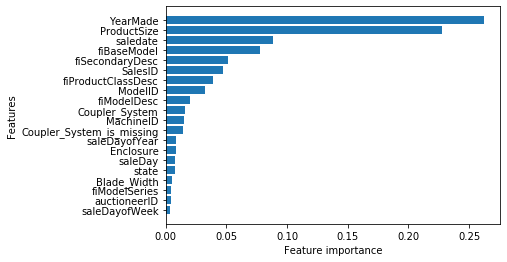

In [63]:
plot_features(X_train.columns, model.feature_importances_)

In [66]:
X_train.head()

Wall time: 994 µs


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,1,4537,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,2,1800,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,1473654,4139,132,99.0,1978,0.0,0,2,2324,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,1327630,8591,132,99.0,1980,0.0,0,2,1799,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,1336053,4089,132,99.0,1984,0.0,0,2,2095,...,True,True,True,True,True,False,False,False,True,True


## 2. Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable.
The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.
The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Dataset.

In [78]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# applying SelectKBest class to extract top 20 best features
bestfeatures = SelectKBest(score_func= chi2, k=20)
fit = bestfeatures.fit(X_train, y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)



In [87]:
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ["Specs", "Score"]
featureScores.head(20)

,Specs,Score
0,SalesID,2.682573e+09
1,MachineID,3.660240e+09
2,ModelID,1.140836e+08
3,datasource,3.941657e+03
4,auctioneerID,3.398924e+05
5,YearMade,7.398711e+05
6,MachineHoursCurrentMeter,1.747396e+08
7,UsageBand,1.075873e+04
8,saledate,2.338284e+06
9,fiModelDesc,3.620249e+06


In [98]:
## Test with f_regression - Regression feature selection (using Pearson's Correlation coefficient)
from sklearn.feature_selection import f_regression

bestfeatures_2 = SelectKBest(score_func= f_regression, k=20)
fit2 = bestfeatures_2.fit(X_train, y_train)
fit2

C:\Users\ankur\new_project\myenv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\ankur\new_project\myenv\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\ankur\new_project\myenv\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\ankur\new_project\myenv\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


SelectKBest(k=20, score_func=<function f_regression at 0x000001E583F37790>)

In [109]:
f = pd.DataFrame(X_train.columns)
s = pd.DataFrame(fit2.scores_)
best_f = pd.concat([f,s], axis = 1)
best_f 
best_f.columns = ["Features", "Scores"]
best_f[:20]

,Features,Scores
0,SalesID,46.142746
1,MachineID,21360.555556
2,ModelID,713.056014
3,datasource,91.747077
4,auctioneerID,810.307221
5,YearMade,10064.815779
6,MachineHoursCurrentMeter,111.066709
7,UsageBand,2155.529185
8,saledate,584.416486
9,fiModelDesc,25.959453


## 3.Correlation Matrix with Heatmap

In [88]:
corr = X_train.corr()
corr

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
SalesID,1.000000,0.286812,0.150199,0.788917,-0.027515,0.001701,0.034438,0.173956,0.486710,0.084880,...,-0.050664,-0.050785,-0.050909,-0.050785,-0.050840,0.029967,0.030564,0.030526,0.009216,0.009211
MachineID,0.286812,1.000000,0.160591,0.327118,-0.003434,-0.060384,0.003093,0.027921,0.071985,0.076119,...,0.005367,0.005293,0.005107,0.005293,0.005356,0.065690,0.065372,0.065324,-0.004706,-0.004873
ModelID,0.150199,0.160591,1.000000,0.091757,-0.021774,-0.049762,0.008446,0.140114,0.153291,0.198127,...,-0.100301,-0.101550,-0.101528,-0.101550,-0.101353,0.114420,0.114374,0.114466,0.044594,0.044475
datasource,0.788917,0.327118,0.091757,1.000000,-0.020805,0.067088,0.037230,0.231098,0.362254,0.024017,...,-0.019906,-0.020400,-0.020551,-0.020400,-0.020477,0.009704,0.011441,0.011374,0.000436,0.000391
auctioneerID,-0.027515,-0.003434,-0.021774,-0.020805,1.000000,-0.015699,0.010025,-0.004085,-0.065769,-0.014000,...,0.032898,0.032859,0.032936,0.032859,0.032874,-0.016068,-0.016554,-0.016557,0.002675,0.002707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Backhoe_Mounting_is_missing,0.029967,0.065690,0.114420,0.009704,-0.016068,-0.013451,0.001238,0.017365,0.070065,-0.130161,...,-0.284402,-0.283162,-0.283295,-0.283162,-0.283039,1.000000,0.990913,0.990905,-0.225948,-0.225866
Blade_Type_is_missing,0.030564,0.065372,0.114374,0.011441,-0.016554,-0.009362,0.001606,0.018763,0.074857,-0.131914,...,-0.287010,-0.285759,-0.285893,-0.285759,-0.285635,0.990913,1.000000,0.999695,-0.228020,-0.227937
Travel_Controls_is_missing,0.030526,0.065324,0.114466,0.011374,-0.016557,-0.009428,0.001604,0.018725,0.074787,-0.131879,...,-0.287013,-0.285761,-0.285895,-0.285761,-0.285637,0.990905,0.999695,1.000000,-0.228022,-0.227939
Differential_Type_is_missing,0.009216,-0.004706,0.044594,0.000436,0.002675,0.000167,-0.010999,0.021616,0.027104,-0.119763,...,-0.263383,-0.262235,-0.262358,-0.262235,-0.262121,-0.225948,-0.228020,-0.228022,1.000000,0.999390


In [92]:
top_corr_features = corr.index
top_corr_features[:20]

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'saledate',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System'],
      dtype='object')

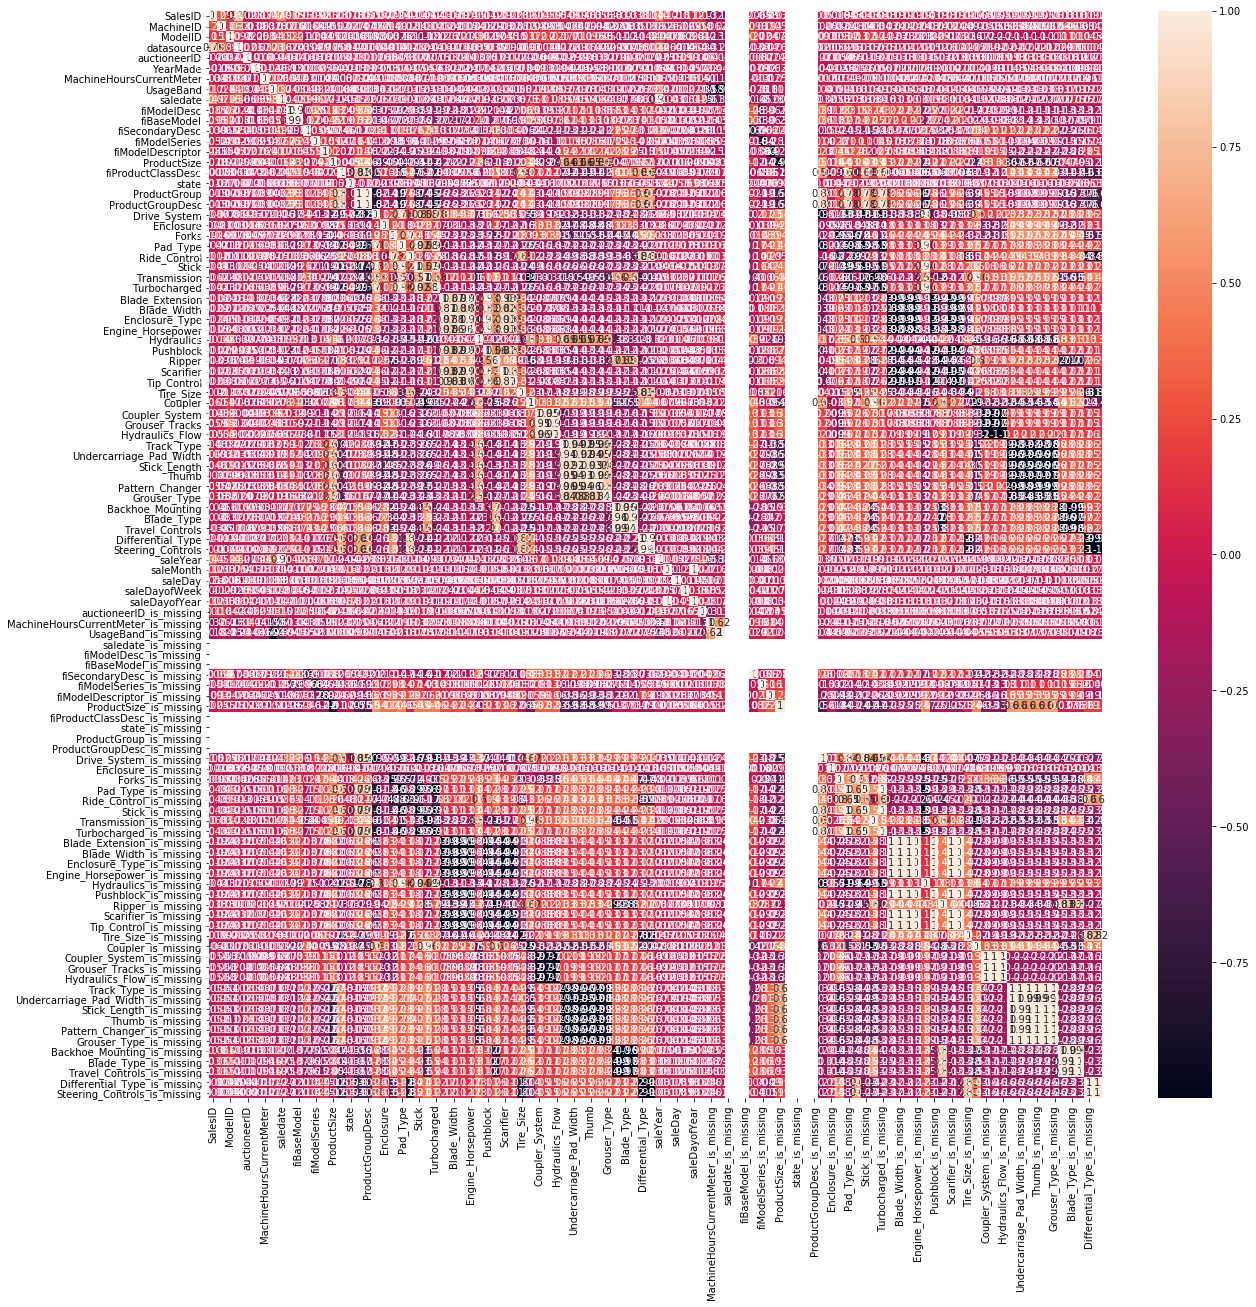

In [96]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot= True)

In [117]:
a = X_train.columns.difference(X_val.columns)
a

Index(['auctioneerID_is_missing'], dtype='object')

In [119]:
X_train_revised = X_train.drop(['auctioneerID_is_missing'], axis = 1)
X_train_revised.shape

(401125, 103)

### Fit the model 

In [120]:
%%time
model.fit(X_train_revised, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [121]:
model.score(X_train_revised, y_train)

0.9878364665869891

In [123]:
y_preds = model.predict(X_val)
y_preds[:20]

array([62545.  , 12480.  , 33897.5 , 64345.76, 84128.  , 54695.  ,
       82340.  , 28022.5 , 67215.  , 58622.5 , 48032.  , 49860.  ,
       38765.5 , 43215.  , 14330.  , 58130.  , 68125.  , 25154.5 ,
       25144.5 , 21510.  ])

In [124]:
model.score(X_val, y_val)

0.2461723646304943

### Building evaluation function

In [126]:
# Create evaluation function (competition has asked for Root mean square log error)

from sklearn.metrics import mean_absolute_error, mean_squared_log_error 

def score (ytest, ypreds):
    msle = mean_squared_log_error(ytest, ypreds)
    return np.sqrt(msle)



0.6126050180052628

In [127]:
score(y_val, y_preds)

0.6126050180052628

### Hyperparameter tuning with RandomizedSearchCV

In [132]:
from sklearn.model_selection import RandomizedSearchCV

#Different RandomForestRegressor hyperparams
params_grid = {"n_estimators" : np.arange(10,100,10),
                        "max_depth" : [None, 3, 5, 10],
                        "min_samples_split" : np.arange(2,20,2),
                        "min_samples_leaf" : np.arange(1,20,2),
                         "max_features" : [0.5, 1, "sqrt", "auto"],
                         "max_samples" :[10000]}

#Instantiate RandomizedSearchCV model
rsc = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state= 42),
                        params_grid,
                        n_iter= 20,
                        cv= 5,
                        verbose= True)

#Fit the randomizedsearchCv model
rsc.fit(X_train_revised, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 10.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [133]:
rsc.best_params_

{'n_estimators': 80,
 'min_samples_split': 18,
 'min_samples_leaf': 5,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [136]:
### Evaluate the RandomizedSearchModel 

y_preds_2 = rsc.predict(X_val)
y_preds_2[:20]

array([58011.79245182, 17870.40985052, 30832.7730492 , 60075.66959695,
       67488.57446761, 51739.98203849, 68840.52457469, 25978.64523752,
       70472.28595489, 56350.09761123, 30264.33554548, 49209.24396682,
       31273.20731709, 31637.25530892, 14144.80133505, 71336.62616999,
       87974.44225199, 28646.02030853, 28456.94688196, 18442.31332135])

In [137]:
score(y_preds_2, y_val)

0.5349507414706725

In [138]:
rsc.score(X_val, y_val)

0.44731343038901195

### Hyperparameter tuning with GridSearchCV 

In [ ]:
from sklearn.model_selection import GridSearchCV

#Setting grid parameters
grid_params = {"n_estimators" : np.arange(10,100,10),
                        "max_depth" : [None, 3, 5, 10],
                        "min_samples_split" : np.arange(2,20,2),
                        "min_samples_leaf" : np.arange(1,20,2),
                         "max_features" : [0.5, 1, "sqrt", "auto"],
              "max_samples" : [10000]}

#Instantiating the GridsearchCV
gsc = GridSearchCV(RandomForestRegressor(n_jobs= -1, random_state= 42),
                  grid_params,
                  cv = 5,
                  verbose = True,
                  return_train_score= True)

#Fit the model 
gsc.fit(X_train_revised, y_train)

Fitting 5 folds for each of 12960 candidates, totalling 64800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [156]:
gsc.score(X_val, y_val)

AttributeError: 'GridSearchCV' object has no attribute 'scorer_'

In [155]:
preds = gsc.predict(X_val)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

### Train a model with the best hyperparameters 

*Note* : These were found after 100 iterations of 'RandomizedSearchCV'
    
    

In [147]:
# Most ideal hyperparameters 
ideal_model = RandomForestRegressor(n_estimators = 40,
                                   min_samples_split= 14,
                                   min_samples_leaf= 1, 
                                   max_features= 0.5,
                                   max_samples= None,
                                    n_jobs = -1,
                                   random_state= 42)

#Fit the model 
ideal_model.fit(X_train_revised, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=14, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [148]:
y_preds_3 = ideal_model.predict(X_val)
y_preds_3

array([55711.524316  , 33645.72342716, 29412.00295975, ...,
       35229.52159575, 67374.38222151, 18000.34188677])

In [149]:
ideal_model.score(X_val, y_val)

0.5953338922133817

In [150]:
score(y_preds_3, y_val)

0.49304756042261955